** * Objective: Basic Statistics practices for  exploratory data analysis (EDA) **  
아래 래퍼런스에는 내부함수를 이용한것을 numpy 를 이용해 재구성  

** * References **
- Data Analysis from the scratch
- ThinkStats  

_ *mathjax library is implemented _
<script type="text/javascript"  src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>

##Describing a Single Set of Data

>  
```css
plt.bar()
```
>  

In [42]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

from __future__ import division



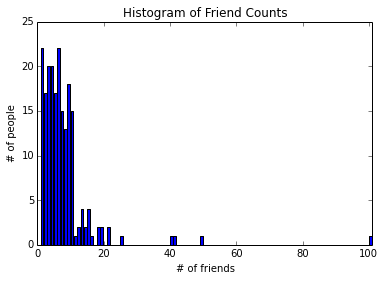

In [31]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)

xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()


##Central Tendencies

** # Mean **

In [43]:
a = np.array([[1, 2], [3, 4]])

aa= np.mean(a)
ab= np.mean(a, axis=0)
ac= np.mean(a, axis=1)

print aa
print ab
print ac

2.5
[ 2.  3.]
[ 1.5  3.5]


** # Median **

In [46]:
np.median(num_friends)

6.0

** # Quantile **  
numpy에서는 percentile로 씀

In [50]:
np.percentile(num_friends,25) # 25%

3.0

#### #Tips:   직접 작성한 라이브러리 패스 설정

In [ ]:
import sys
#sys.path.append("/Users/syleeie/analyticstool/part1/python/code-python3") #난 Numpy 쓸거니까 무시.

## Dispersion  분포, 산포

** #변동계수?? ** [설명](http://terms.naver.com/entry.nhn?docId=293901&cid=42412&categoryId=42412)


## Correlation
covariance는 단위unit가 다른 것들의 곱이고, 지표간 크기/스케일이 다른 문제점이 있음 
그래서 각각의 표준편차를 나눈 correlation가 도출됨  
covariance가 0에 가까워야 상관도가 적음


** #Covariance matrix:   **  

In [54]:
np.cov(num_friends, daily_minutes)

array([[  81.54351396,   22.42543514],
       [  22.42543514,  100.78589895]])

Covariance Matrix는 아래와 같음
\begin{bmatrix} \sum { XX }  & \sum { XY }  \\ \sum { YX }  & \sum { YY }  \end{bmatrix}

따라서 위 에서 22.42XX 이부분이 두 지표의 공분산(covariance)임


** # Correlation **


In [56]:
np.corrcoef(num_friends,daily_minutes) # 0.24

array([[ 1.        ,  0.24736957],
       [ 0.24736957,  1.        ]])

** correlation equation: **

$$\rho _{ X,Y }=corr(X,Y)=\frac { _{ cov(X,Y) } }{ \sigma _{ X }\sigma _{ Y } } $$


corr =
[[ 1.          0.24736957]
 [ 0.24736957  1.        ]]


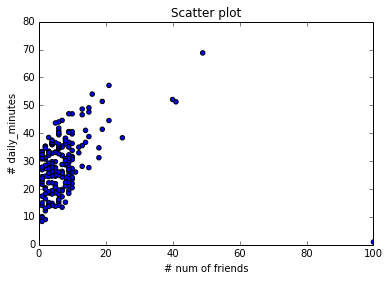

In [61]:
corr = np.corrcoef(num_friends, daily_minutes) 
print "corr =\n", corr 

plt.scatter(num_friends, daily_minutes)
plt.axis([0, 100, 0, 80])
plt.title("Scatter plot")
plt.xlabel("# num of friends")
plt.ylabel("# daily_minutes")
plt.show()

** #Outliers 처리 **

In [65]:
outlier = num_friends.index(100) # index of outlier, 그래프 보고 아웃라이어 하드하게 추출. 

num_friends_good = [x for i, x in enumerate(num_friends)  if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

np.corrcoef(num_friends_good, daily_minutes_good) # 0.57

array([[ 1.        ,  0.57367921],
       [ 0.57367921,  1.        ]])

outlier 제거후에 correlation이 더 증가함을 확인 할 수 있음


## Simpson’s Paradox --> 유명하니까 생략



## Correlational Caveats

** # correlation 이 0(zero)일때, 두 변수간의 관계는 없다?? --> NO! **


In [ ]:
x = [ -2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]
np.corrcoef(x,y) # corr = 0

correlation 이 0 으로 나오나, 명백히 절대값을 취한 관계를 아래와 같이 알수 있음

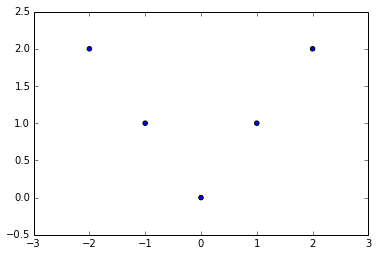

In [68]:
plt.scatter(x,y)

** # correlation은 관계가 얼마나 큰지는 알려줄 수 없다. **   
예시:

corr = [[ 1.          0.83405766]
 [ 0.83405766  1.        ]]


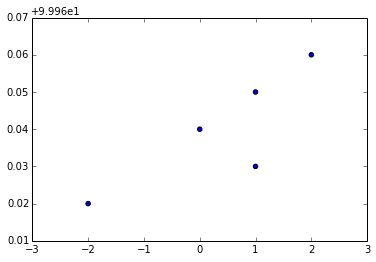

In [73]:
x = [-2,1,0,1,2]
y = [99.98,99.99, 100, 100.01, 100.02]
print "corr =", np.corrcoef(x,y) # corr = 0.83
plt.scatter(x,y)

##Correlation and Causation  

- 사실 상관관계와 인과관계를 정확히 구분하거나 인과성을 찾는건 어려운 일 (causality check나 graphical modeling, domain 지식, 논리학, 실험등등이 필요 )  
- 겉으로는 그럴듯해보이는 이상한 상관관계의 도표 모음(재미) [링크](http://www.tylervigen.com/spurious-correlations)
